In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
coordinates = list(lat_lngs)

In [11]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | trunovskoye
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | qostanay
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | yei
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | cayenne
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | vastervik
Ci

Processing Record 34 of Set 4 | willmar
Processing Record 35 of Set 4 | iqaluit
Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | road town
Processing Record 38 of Set 4 | charters towers
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | nola
Processing Record 41 of Set 4 | vanavara
Processing Record 42 of Set 4 | qui nhon
Processing Record 43 of Set 4 | dalvik
Processing Record 44 of Set 4 | altay
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | central point
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 50 of Set 4 | kizukuri
Processing Record 1 of Set 5 | msowero
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | ha giang
Processing Record 4 of Set 5 | chapais
Processing Record 5 of Set 5 | horsham
Processing Record 6 of Set 5 | herat
Processing Record 7 of Set 5 | carball

Processing Record 20 of Set 8 | goderich
Processing Record 21 of Set 8 | bilibino
Processing Record 22 of Set 8 | sao filipe
Processing Record 23 of Set 8 | mwanza
Processing Record 24 of Set 8 | lavrentiya
Processing Record 25 of Set 8 | faanui
Processing Record 26 of Set 8 | nesterov
Processing Record 27 of Set 8 | bullhead city
Processing Record 28 of Set 8 | zapolyarnyy
Processing Record 29 of Set 8 | anloga
Processing Record 30 of Set 8 | port hedland
Processing Record 31 of Set 8 | tarnogskiy gorodok
Processing Record 32 of Set 8 | lima
Processing Record 33 of Set 8 | brazii
Processing Record 34 of Set 8 | faya
Processing Record 35 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 8 | goma
Processing Record 37 of Set 8 | simao
Processing Record 38 of Set 8 | high level
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | finnsnes
Processing Record 42 of Set 8 | tiznit
Processing Record

Processing Record 9 of Set 12 | guangyuan
Processing Record 10 of Set 12 | cervo
Processing Record 11 of Set 12 | kribi
Processing Record 12 of Set 12 | uyovu
Processing Record 13 of Set 12 | witrivier
City not found. Skipping...
Processing Record 14 of Set 12 | williamsburg
Processing Record 15 of Set 12 | lompoc
Processing Record 16 of Set 12 | san patricio
Processing Record 17 of Set 12 | zhigansk
Processing Record 18 of Set 12 | linhai
Processing Record 19 of Set 12 | mongomo
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | caohe
Processing Record 22 of Set 12 | baruun-urt
Processing Record 23 of Set 12 | andapa
Processing Record 24 of Set 12 | muroto
Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | shache
Processing Record 27 of Set 12 | gewane
Processing Record 28 of Set 12 | cuiluan
Processing Record 29 of Set 12 | banfora
Processing Record 30 of Set 12 | narsaq
Processing Record 31 of Set 12 | panama city
Processing Record

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,81.90,88,20,1.99,MY,2021-05-24 21:57:42
1,Trunovskoye,45.4878,42.1358,63.19,98,99,11.21,RU,2021-05-24 21:57:42
2,Avarua,-21.2078,-159.7750,84.25,79,20,11.50,CK,2021-05-24 21:57:43
3,Butaritari,3.0707,172.7902,74.89,89,100,7.38,KI,2021-05-24 21:57:43
4,Hobart,-42.8794,147.3294,55.26,85,75,3.00,AU,2021-05-24 21:57:44
5,Qostanay,53.1667,63.5833,61.09,55,0,6.71,KZ,2021-05-24 21:57:44
6,Albany,42.6001,-73.9662,73.99,40,26,3.71,US,2021-05-24 21:55:13
7,Hilo,19.7297,-155.0900,82.80,79,9,8.99,US,2021-05-24 21:57:45
8,Bubaque,11.2833,-15.8333,79.30,74,89,21.61,GW,2021-05-24 21:57:45
9,Mataura,-46.1927,168.8643,36.66,82,5,2.77,NZ,2021-05-24 21:57:46


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-05-24 21:57:42,5.4112,100.3354,81.90,88,20,1.99
1,Trunovskoye,RU,2021-05-24 21:57:42,45.4878,42.1358,63.19,98,99,11.21
2,Avarua,CK,2021-05-24 21:57:43,-21.2078,-159.7750,84.25,79,20,11.50
3,Butaritari,KI,2021-05-24 21:57:43,3.0707,172.7902,74.89,89,100,7.38
4,Hobart,AU,2021-05-24 21:57:44,-42.8794,147.3294,55.26,85,75,3.00


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

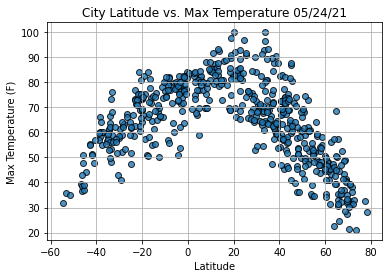

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

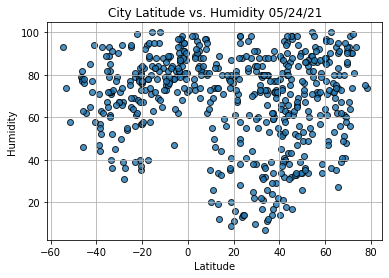

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

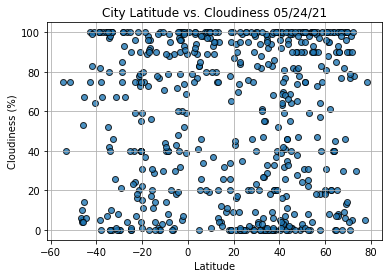

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

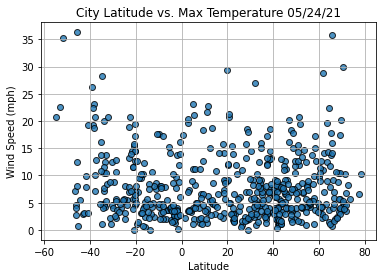

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-05-24 21:57:42,5.4112,100.3354,81.90,88,20,1.99
1,Trunovskoye,RU,2021-05-24 21:57:42,45.4878,42.1358,63.19,98,99,11.21
3,Butaritari,KI,2021-05-24 21:57:43,3.0707,172.7902,74.89,89,100,7.38
5,Qostanay,KZ,2021-05-24 21:57:44,53.1667,63.5833,61.09,55,0,6.71
6,Albany,US,2021-05-24 21:55:13,42.6001,-73.9662,73.99,40,26,3.71


In [31]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

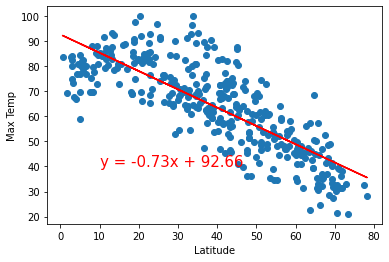

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

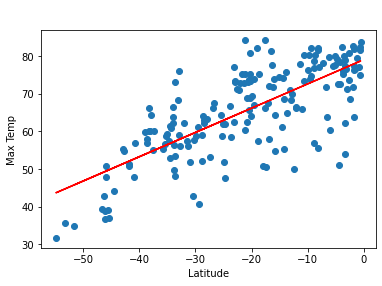

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

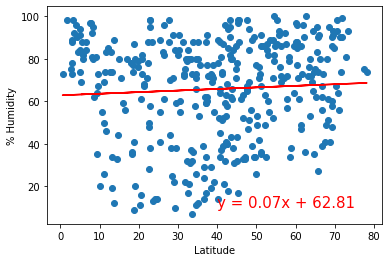

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

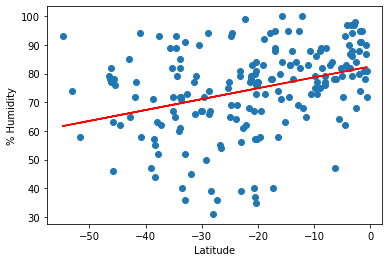

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

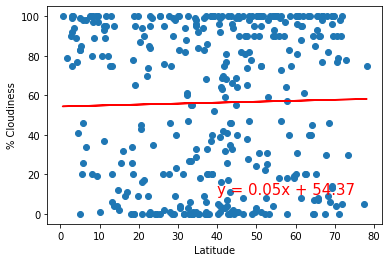

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

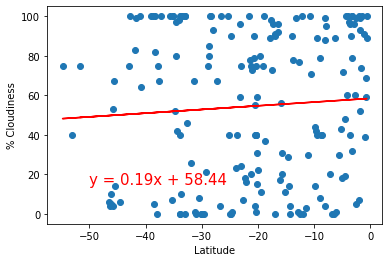

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

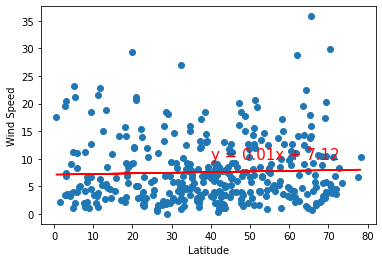

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

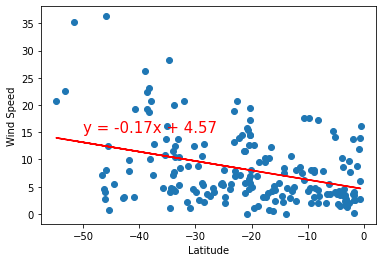

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))